In [21]:
import cv2
import json
import os
import matplotlib.pyplot as plt

In [22]:
ground_truth = '/mnt/data/dataset/apple-defects/original/groundtruth.json'

In [23]:
data[0]

{'name': '23945062_20211104_130047_305',
 'image_path': '/root/data/apple/original/images/23945062_20211104_130047_305.jpg',
 'cropped_image_path': '/root/data/apple/original/images/23945062_20211104_130047_305.jpg',
 'class_id': [3, 3, 3, 3, 3, 3],
 'class_name': ['blight', 'blight', 'blight', 'blight', 'blight', 'blight'],
 'yolo_annotations': [[0.4236111111111111,
   0.378173828125,
   0.028594771241830064,
   0.04150390625],
  [0.6887254901960784, 0.26904296875, 0.03349673202614379, 0.0322265625],
  [0.542687908496732, 0.280029296875, 0.0363562091503268, 0.02978515625],
  [0.539828431372549, 0.30419921875, 0.030637254901960783, 0.0341796875],
  [0.4791666666666667, 0.31982421875, 0.026143790849673203, 0.0419921875],
  [0.40604575163398693, 0.427490234375, 0.022058823529411766, 0.02783203125]],
 'crop_coordinates_ratio': [[0.11616847826086953,
   0.21433423913043478,
   0.04755434782608696,
   0.057744565217391304],
  [0.5570652173913043, 0.0625, 0.05570652173913043, 0.0448369565217

In [17]:
image_path  = '/mnt/data/dataset/apple-defects/original/images/'
yolo_annot = data[0]['crop_coordinates_ratio']
image = cv2.imread(image_path + data[0]['name'] + '.jpg')

In [18]:
for annot in yolo_annot:
    height, width, _ = image.shape
    cx = int(annot[0] * width)
    cy = int(annot[1] * height)
    w = int(annot[2] * width)
    h = int(annot[3] * height)
    
    # draw bounding box by opencv
    cv2.rectangle(image, (cx - w//2, cy - h//2), (cx + w//2, cy + h//2), (0, 0, 255), 2)


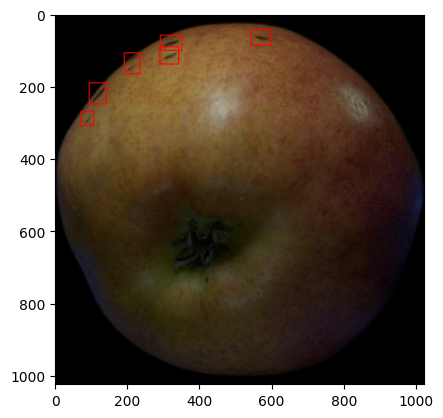

In [19]:
plt.imshow(image[:,:,::-1])

In [24]:
with open(ground_truth) as f:
    data = json.load(f)

filtered_data = [x for x in data if set(x['class_id']) in [{3}, {1,3}, {1}]]

In [ ]:
text_path = '/mnt/data/dataset/apple-defects/yolo/original/labels/'
label_mapping = {1: 0, 3: 1}
for item in filtered_data:
    with open(text_path + item['name'] + '.txt', 'w') as f:
        for label, box in zip(item['class_id'], item['crop_coordinates_ratio']):
            label_id = label_mapping[label]
            cx = box[0]
            cy = box[1]
            w = box[2]
            h = box[3]
            # write label_id cx cy w h to text file
            f.write(f'{label_id} {cx} {cy} {w} {h}\n')
        

In [5]:
len(filtered_data)

710

In [4]:
filtered_data

[{'name': '23945062_20211104_130047_305',
  'image_path': '/root/data/apple/original/images/23945062_20211104_130047_305.jpg',
  'cropped_image_path': '/root/data/apple/original/images/23945062_20211104_130047_305.jpg',
  'class_id': [3, 3, 3, 3, 3, 3],
  'class_name': ['blight', 'blight', 'blight', 'blight', 'blight', 'blight'],
  'yolo_annotations': [[0.4236111111111111,
    0.378173828125,
    0.028594771241830064,
    0.04150390625],
   [0.6887254901960784, 0.26904296875, 0.03349673202614379, 0.0322265625],
   [0.542687908496732, 0.280029296875, 0.0363562091503268, 0.02978515625],
   [0.539828431372549, 0.30419921875, 0.030637254901960783, 0.0341796875],
   [0.4791666666666667, 0.31982421875, 0.026143790849673203, 0.0419921875],
   [0.40604575163398693, 0.427490234375, 0.022058823529411766, 0.02783203125]],
  'crop_coordinates_ratio': [[0.11616847826086953,
    0.21433423913043478,
    0.04755434782608696,
    0.057744565217391304],
   [0.5570652173913043, 0.0625, 0.055706521739130

In [38]:
len(os.listdir('/mnt/data/dataset/apple-defects/version-1/images/'))

965

In [6]:
output_dir = '/mnt/data/dataset/apple-defects/version-3/labelTxt/'
img_dir = '/mnt/data/dataset/apple-defects/version-3/images/'
org_img_dir = '/mnt/data/dataset/apple-defects/orginal/images/'

os.makedirs(output_dir, exist_ok=True)
os.makedirs(img_dir, exist_ok=True)

for item in filtered_data:
    image_name = item['name']
    image = cv2.imread(org_img_dir + image_name + '.jpg')
    cv2.imwrite(img_dir + image_name + '.jpg', image)
    height, width, _ = image.shape
    
    annotation = item['crop_coordinates_ratio']
    class_name = item['class_name']
    new_box = []
    for anno, label in zip(annotation, class_name):
        cx, cy, w, h = anno
        x1 = int((cx - w/2) * width)
        y1 = int((cy - h/2) * height)
        x2 = int((cx + w/2) * width)
        y2 = int((cy - h/2) * height)
        x3 = int((cx + w/2) * width)
        y3 = int((cy + h/2) * height)
        x4 = int((cx - w/2) * width)
        y4 = int((cy + h/2) * height)
        
        # perform boundary checks
        x1 = max(0, min(x1, width - 1))
        y1 = max(0, min(y1, height - 1))
        x2 = max(0, min(x2, width - 1))
        y2 = max(0, min(y2, height - 1))
        x3 = max(0, min(x3, width - 1))
        y3 = max(0, min(y3, height - 1))
        x4 = max(0, min(x4, width - 1))
        y4 = max(0, min(y4, height - 1))
        
        new_box.append([x1, y1, x2, y2, x3, y3, x4, y4, label, 0])
        
        cv2.rectangle(image, (x1, y1), (x3, y3), (0, 255, 0), 2)
    
    # Create the text file
    txt_file_path = os.path.join(output_dir, image_name + '.txt')
    with open(txt_file_path, 'w') as f:
        for box in new_box:
            line = ' '.join(str(coord) for coord in box)
            f.write(line + '\n')
    

In [13]:
class Apple_Dataset:
    

{'name': '23945062_20211104_130047_305',
 'image_path': '/root/data/apple/original/images/23945062_20211104_130047_305.jpg',
 'cropped_image_path': '/root/data/apple/original/images/23945062_20211104_130047_305.jpg',
 'class_id': [3, 3, 3, 3, 3, 3],
 'class_name': ['blight', 'blight', 'blight', 'blight', 'blight', 'blight'],
 'yolo_annotations': [[0.4236111111111111,
   0.378173828125,
   0.028594771241830064,
   0.04150390625],
  [0.6887254901960784, 0.26904296875, 0.03349673202614379, 0.0322265625],
  [0.542687908496732, 0.280029296875, 0.0363562091503268, 0.02978515625],
  [0.539828431372549, 0.30419921875, 0.030637254901960783, 0.0341796875],
  [0.4791666666666667, 0.31982421875, 0.026143790849673203, 0.0419921875],
  [0.40604575163398693, 0.427490234375, 0.022058823529411766, 0.02783203125]],
 'crop_coordinates_ratio': [[0.11616847826086953,
   0.21433423913043478,
   0.04755434782608696,
   0.057744565217391304],
  [0.5570652173913043, 0.0625, 0.05570652173913043, 0.0448369565217

In [19]:
path = '/mnt/data/dataset/apple-defects/version-2/labelTxt/'

In [20]:
len(os.listdir(path))

9702

In [8]:
path = '/mnt/data/dataset/apple-defects/version-4/images/'

han = [sample for sample in os.listdir(path)]

In [9]:
label_list_path = '/mnt/data/dataset/apple-defects/version-4/label_list.txt'

with open(label_list_path, 'w') as f:
    for item in han:
        f.write(item.split('.')[0] + '\n')

In [10]:
annot_path = '/mnt/data/dataset/apple-defects/version-4/labelTxt/'

annot_list = os.listdir(annot_path)

num = 0
for item in annot_list:
    with open(annot_path + item, 'r') as f:
        lines = f.readlines()
        if len(lines) == 0:
            num += 1


In [16]:
num

3491

In [12]:
len(annot_list)

8685

In [15]:
8685 - 3491

5194

In [33]:
test = '/mnt/data/dataset/apple-defects/version-2/images/23945062_20211025_204045_245__2__1024___924.jpg'

img = cv2.imread(test)

In [1]:
import json
import os
import shutil

In [2]:
path = 'data.json'


In [3]:
with open(path) as f:
    data = json.load(f)

In [4]:
org_dir =  '/mnt/data/dataset/apple-defects/orginal/images/'
image_path = '/mnt/data/dataset/apple-defects/inference/images/'
label_path = '/mnt/data/dataset/apple-defects/inference/labelTxt/'
image_lists_text_path = '/mnt/data/dataset/apple-defects/inference/image_lists.txt'

In [9]:
import shutil
APPLE_CLASSES = ['blight', 'scratch', 'normal']


for item in data:
    image_name = item['name']
    temp_boxes = item['crop_coordinates_ratio']
    class_names = item['class_name']
    class_ids = item['class_id']
    annotation = []
    width = 1024
    height = 1024
    
    for box, class_name in zip(temp_boxes, class_names):
        cx, cy, w, h = box
        x1 = int((cx - w / 2) * width)
        y1 = int((cy - h / 2) * height)
        x2 = int((cx + w / 2) * width)
        y2 = int((cy - h / 2) * height)
        x3 = int((cx + w / 2) * width)
        y3 = int((cy + h / 2) * height)
        x4 = int((cx - w / 2) * width)
        y4 = int((cy + h / 2) * height)
        
        # perform boundary checks
        x1 = max(0, min(x1, width - 1))
        y1 = max(0, min(y1, height - 1))
        x2 = max(0, min(x2, width - 1))
        y2 = max(0, min(y2, height - 1))
        x3 = max(0, min(x3, width - 1))
        y3 = max(0, min(y3, height - 1))
        x4 = max(0, min(x4, width - 1))
        y4 = max(0, min(y4, height - 1))

        annotation.append([x1, y1, x2, y2, x3, y3, x4, y4, class_name, 0])
    
    # Copy image from org_dir to image_path
    shutil.copy(org_dir + image_name + '.jpg', image_path)
    
    # Write annotation to label_path
    with open(label_path + image_name + '.txt', 'w') as f:
        for box in annotation:
            line = ' '.join(str(coord) for coord in box)
            f.write(line + '\n')
    
    # Write image name to image_lists_text_path
    with open(image_lists_text_path, 'a') as f:
        f.write(image_name + '\n')
    

In [8]:
import json
import random

In [9]:
gt_path = '/mnt/data/dataset/apple-defects/version-1/groundtruth.json'

In [10]:
with open(gt_path) as f:
    data = json.load(f)

filtered_data = [item for item in data if set(item['class_id']) in ({1}, {3}, {1, 3})]
random.Random(44).shuffle(filtered_data)

In [15]:
len(filtered_data)

710

In [12]:
train = filtered_data[:int(len(filtered_data) * 0.8)]
val = filtered_data[int(len(filtered_data) * 0.8):]

In [17]:
# write train to json
with open('/mnt/data/dataset/apple-defects/version-1/train.json', 'w') as f:
    json.dump(train, f)
with open('/mnt/data/dataset/apple-defects/version-1/val.json', 'w') as f:
    json.dump(val, f)

In [16]:
len(train)

568

In [32]:
img_dir = '/mnt/data/dataset/apple-defects/orginal/images/'
label_dir = '/mnt/data/dataset/apple-defects/version-1/labelTxt/'
train_dir = '/mnt/data/dataset/apple-defects/train-test-split/train/'
val_dir = '/mnt/data/dataset/apple-defects/train-test-split/val/'

In [34]:
import shutil

for item in train:
    image_name = item['name']
    shutil.copy(img_dir + image_name + '.jpg', train_dir + 'images/')
    shutil.copy(label_dir + image_name + '.txt', train_dir + 'labelTxt/')

In [39]:
import os


image_list_path = '/mnt/data/dataset/apple-defects/train-test-split/val/image_list.txt'

with open(image_list_path, 'w') as f:
    for item in os.listdir(val_dir + 'images/'):
        f.write(item.split('.')[0] + '\n')

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
print(box[:, 0::2])
print(width - box[:, 0::2])

[[630. 681. 681. 630.]]
[[394. 343. 343. 394.]]


In [12]:
height, width = image.shape[:2]

box[:, 0::2] = width - box[:, 0::2]

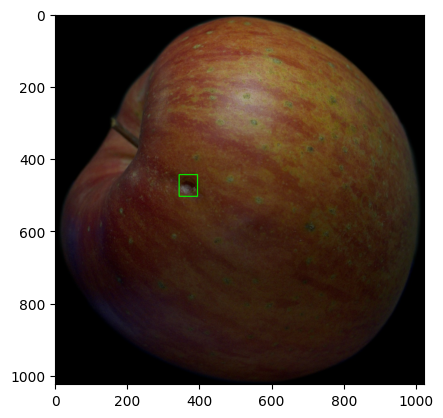

In [25]:
image_path = '/mnt/code/gaussnet-apple-patching/23945062_20211025_155302_653.jpg'

image = cv2.imread(image_path)
img_flip = image[:,::-1].copy()

boxes = box.copy()
boxes[:, 0::2] = width - box[:, 0::2]
for b in boxes:
    x1, y1, x2, y2, x3, y3, x4, y4 = b
    cv2.rectangle(img_flip, (int(x1), int(y1)), (int(x3), int(y3)), (0, 255, 0), 2)
    
plt.imshow(img_flip[:,:,::-1])

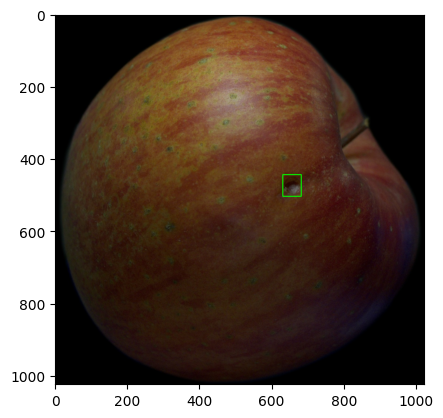

In [13]:
image_path = '/mnt/code/gaussnet-apple-patching/23945062_20211025_155302_653.jpg'

image = cv2.imread(image_path)

box = np.array([[630., 444., 681., 444., 681., 504., 630., 504.]])

for b in box:
    x1, y1, x2, y2, x3, y3, x4, y4 = b
    cv2.rectangle(image, (int(x1), int(y1)), (int(x3), int(y3)), (0, 255, 0), 2)
    
plt.imshow(image[:,:,::-1])

In [1]:
import os
import shutil

image_path = '/mnt/data/dataset/apple-defects/normal/images/'

label_src_path = '/mnt/data/dataset/apple-defects/version-1/labelTxt/'
label_dst_path = '/mnt/data/dataset/apple-defects/normal/labelTxt/'

# check if image name is in label path and copy to label_dst_path
for item in os.listdir(image_path):
    if item.split('.')[0] + '.txt' in os.listdir(label_src_path):
        shutil.copy(label_src_path + item.split('.')[0] + '.txt', label_dst_path)


In [4]:
import pandas as pd


df = pd.read_csv('./assets/pred.csv')
df_name = df.groupby('image').size().reset_index(name='count')

In [9]:
df['label'].value_counts()

label
0    32
1    24
Name: count, dtype: int64

In [12]:
import os
import shutil

for i, v in df_name.iterrows():
    image_name = v['image']
    shutil.copy(f'/mnt/code/gaussnet-apple-patching/img-out-240215/{image_name}.jpg', f'/mnt/data/dataset/apple-defects/normal/wrong-defective/{image_name}.jpg')

In [26]:
src_label_dir = '/mnt/data/dataset/apple-defects/augmentation/labels/'
src_img_dir = '/mnt/data/dataset/apple-defects/augmentation/images/'

dst_label_dir = '/mnt/data/dataset/apple-defects/augmentation/labels_soda/'
image_lists_text_path = '/mnt/data/dataset/apple-defects/augmentation/train/image_list.txt'

label_dict = {0: 'scratch', 1: 'blight'}
# loop throught src_label_dir and manipulate the label text file
width = 1024
height = 1024

label_list = os.listdir(src_label_dir)
for label in label_list:
    image_name = label.split('.')[0]
    with open(src_label_dir + label, 'r') as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip().split()
            label_id = int(line[0])
            cx = float(line[1])
            cy = float(line[2])
            w = float(line[3])
            h = float(line[4])
            
            x1 = int((cx - w/2) * width)
            y1 = int((cy - h/2) * height)
            x2 = int((cx + w/2) * width)
            y2 = int((cy - h/2) * height)
            x3 = int((cx + w/2) * width)
            y3 = int((cy + h/2) * height)
            x4 = int((cx - w/2) * width)
            y4 = int((cy + h/2) * height)

            # perform boundary checks
            x1 = max(0, min(x1, width - 1))
            y1 = max(0, min(y1, height - 1))
            x2 = max(0, min(x2, width - 1))
            y2 = max(0, min(y2, height - 1))
            x3 = max(0, min(x3, width - 1))
            y3 = max(0, min(y3, height - 1))
            x4 = max(0, min(x4, width - 1))
            y4 = max(0, min(y4, height - 1))

            
            
            # write to dst_label_dir
            with open(dst_label_dir + label, 'a') as f:
                f.write(f'{x1} {y1} {x2} {y2} {x3} {y3} {x4} {y4} {label_dict[label_id]} 0\n')
    
    with open(image_lists_text_path, 'a') as f:
        f.write(image_name + '\n')




In [29]:
# write txt file if label path is empty but have image path
image_list = os.listdir(src_img_dir)
for image in image_list:
    image_name = image.split('.')[0]
    label_path = os.path.join(dst_label_dir, image_name + '.txt')
    
    if image_name + '.txt' not in os.listdir(dst_label_dir):
        with open(label_path, 'w') as f:
            f.write('') 

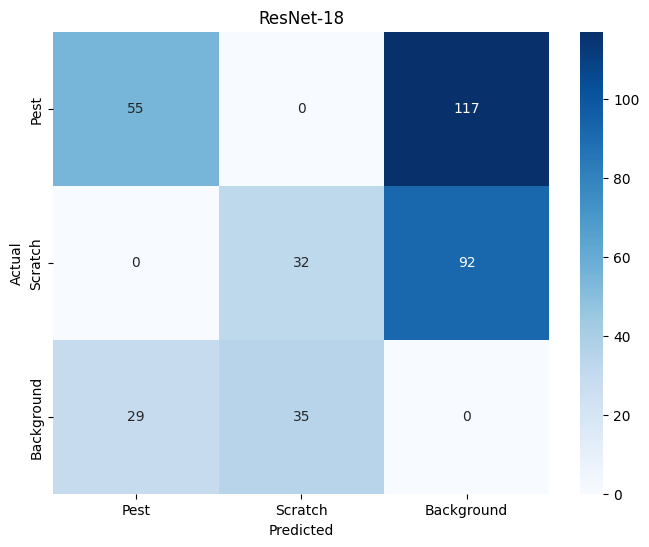

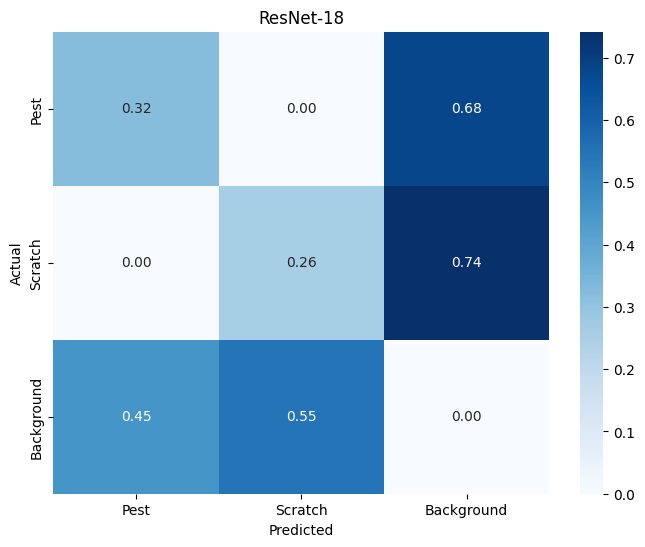

In [23]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.metrics import confusion_matrix

# Confusion matrix data  
confusion_matrix = np.array([[55, 0, 117],  
                            [0, 32, 92],  
                            [29, 35, 0]])  


# Display the confusion matrix using seaborn's heatmap  
plt.figure(figsize=(8, 6))  
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pest', 'Scratch', 'Background'],  
            yticklabels=['Pest', 'Scratch', 'Background'])  
plt.title('ResNet-18')  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.show()

normalized_confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)  
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_confusion_matrix, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Pest', 'Scratch', 'Background'],
            yticklabels=['Pest', 'Scratch', 'Background'])
plt.title('ResNet-18')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()